In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import math
from numpy import linalg as LA
from sklearn.neighbors import KDTree
from sklearn.neighbors import kneighbors_graph
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Data Generation

In [2]:
# p = [250,500,1000,2000]
# p = [2000]


def gendata(dim):
    p = [dim]
    data = {}
    for i in range(0,len(p)):
        mean = np.full(p[i], 3/math.sqrt(p[i])) 
        cov = np.identity(p[i])
    #     print(mean[i], cov[i])
        x1 = np.random.multivariate_normal(mean, cov, 5000).T
        x2 =  np.random.multivariate_normal(np.multiply(-1,mean), cov, 5000).T
        data[i] = np.concatenate((x1.T, x2.T), axis=0)
        
    return data[0]
    


In [ ]:
data[3].shape

In [4]:
labels = np.zeros((10000))
labels[range(5001,10000)] = 1

In [ ]:
plt.plot(data[i][0],data[i][1], 'x')
plt.axis('equal')
plt.show()
print(data[0].shape)

# EXACT

In [230]:
%%time
score = []
for i in range(1):
    data = gendata(1000)
    kmeans = KNeighborsClassifier(n_neighbors=50, algorithm = 'brute', n_jobs=-1).fit(data, labels)
    score.append(accuracy_score(labels, kmeans.predict(data)))
    print('Accuracy:{0:f}'.format(score[i]))

Accuracy:0.994700
CPU times: user 7.34 s, sys: 3.12 s, total: 10.5 s
Wall time: 13.5 s


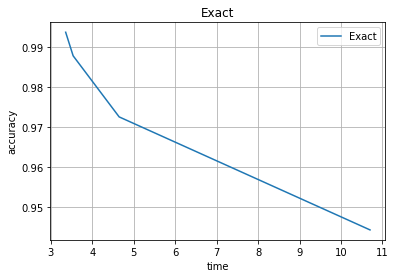

In [132]:
time = [3.36,3.54,4.65,10.7]
accuracy = [0.993700,0.987800,0.972500,0.944200]
fig, ax = plt.subplots()

ax.plot(time,accuracy, label='Exact')
# ax.plot(range(0,n),denoised[:], label='data_corrected')
ax.set_title('Exact')
ax.set_xlabel('time') 
ax.set_ylabel('accuracy')
ax.grid()
leg = ax.legend()
plt.savefig('exact',dpi=300, bbox_inches='tight')
plt.show()

# Spectral Clustering

In [229]:
%%time

#####################Spectral Clustering#################
# A_dist = {}
# for i in range(0,len(data)):
#     A_dist[i] = kneighbors_graph(data[i], n_neighbors=5, mode='distance', include_self=True,n_jobs=-1)
data = gendata(250)
k = 50
A_All = {}
for i in range(1):
    A_All[i] = kneighbors_graph(data, n_neighbors=k)
    
####################get the L matrix##############
A = A_All[0].toarray()
A = np.maximum(A,A.T)

# Ddiag = np.diag(np.ones(A.shape[0])/np.sqrt(A.sum(axis=1)))
Ddiag = np.diag(np.ones(A.shape[0])/A.sum(axis=1))
print(Ddiag)
L = np.matmul(np.matmul(Ddiag, A),Ddiag)
print(L)

###############Get eigen vectors##########

w, v = np.linalg.eig(L)

#################get Y################
ind  =np.argpartition(w, -k)[-k:]
X = v[:,ind]
print(X.shape[0])
Y = np.zeros((X.shape[0],X.shape[1]))
for i in range(0,X.shape[0]):
    for j in range(0,X.shape[1]):
        Y[i,j] = X[i,j]/math.sqrt(np.sum(np.square(X[i,:])))

#############get kmeans on Y##############
Y.shape
kmeansSC = KNeighborsClassifier(n_neighbors=k, algorithm = 'brute', n_jobs=None).fit(Y, labels)
score = accuracy_score(labels, kmeansSC.predict(Y))
print('Accuracy:{0:f}'.format(score))
# print(kmeans.labels_)

[[0.01639344 0.         0.         ... 0.         0.         0.        ]
 [0.         0.01886792 0.         ... 0.         0.         0.        ]
 [0.         0.         0.015625   ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.01785714 0.         0.        ]
 [0.         0.         0.         ... 0.         0.01818182 0.        ]
 [0.         0.         0.         ... 0.         0.         0.01960784]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
10000
Accuracy:0.996200
CPU times: user 29min 37s, sys: 23.5 s, total: 30min
Wall time: 9min 59s


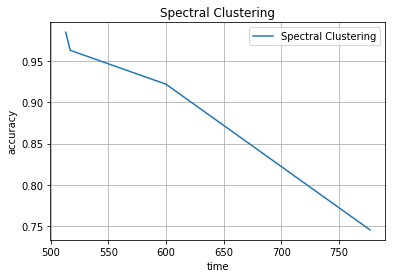

In [167]:
time = [513,517,600,777]
accuracy = [0.984700,0.962800,0.921800,0.745400]
fig, ax = plt.subplots()

ax.plot(time,accuracy, label='Spectral Clustering')
# ax.plot(range(0,n),denoised[:], label='data_corrected')
ax.set_title('Spectral Clustering')
ax.set_xlabel('time') 
ax.set_ylabel('accuracy')
ax.grid()
leg = ax.legend()
plt.savefig('spectralClustering',dpi=300, bbox_inches='tight')
plt.show()

# Discussion for Bandwidth Parameter

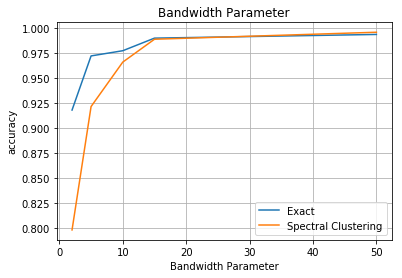

In [234]:
####### discussion of bandwidth parameter#############
#### time is with parallelization########
k = [2, 5, 10, 15 ,50]
time = [7.3, 4.65, 7.43,7.58, 13.5 ]
accuracy1 = [0.918300, 0.972500,0.977700, 0.990300, 0.994]

##############for spectral clustering#######
k = [2, 5, 10,15, 50 ]
time1 = [ 502 ,600,668,700,712 ]
accuracy2 = [ 0.798300,0.921800, 0.966300, 0.989200, 0.996200]

fig, ax = plt.subplots()
ax.plot(k,accuracy1, label='Exact')
ax.plot(k, accuracy2, label='Spectral Clustering')
ax.set_title('Bandwidth Parameter')
ax.set_xlabel('Bandwidth Parameter') 
ax.set_ylabel('accuracy')
ax.grid()
leg = ax.legend()
plt.savefig('spectralClustering',dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
ax.plot(k,accuracy1, label='Exact')
ax.plot(k, accuracy2, label='Spectral Clustering')
ax.set_title('Bandwidth Parameter')
ax.set_xlabel('Bandwidth Parameter') 
ax.set_ylabel('accuracy')
ax.grid()
leg = ax.legend()
plt.savefig('spectralClustering',dpi=300, bbox_inches='tight')
plt.show()


# JL + Exact

In [51]:
%%time
########################JL + KNN################

data = gendata(2000)
print(data.shape)
JLdim = johnson_lindenstrauss_min_dim(data.shape[0], eps=0.9)
print(JLdim)
dataJL = data[:,:JLdim]
print(data.shape)
kmeansJL = KNeighborsClassifier(n_neighbors=5, algorithm = 'brute', n_jobs=None).fit(dataJL, labels)
score = accuracy_score(labels, kmeansJL.predict(dataJL))
print('Accuracy:{0:f}'.format(score))
print(dataJL.shape)

(10000, 2000)
227
(10000, 2000)
Accuracy:0.788900
(10000, 227)
CPU times: user 29.6 s, sys: 883 ms, total: 30.5 s
Wall time: 9.18 s


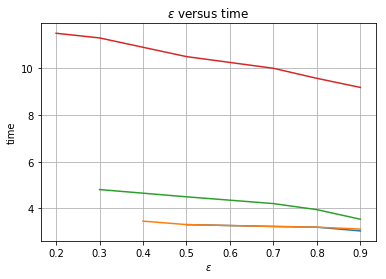

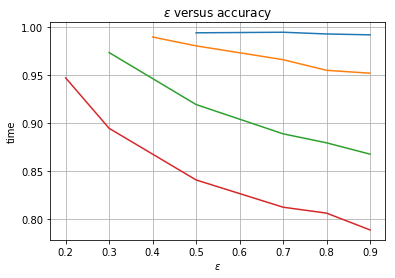

In [176]:
####250 
eps1 = [0.5,0.7, 0.8,0.9] 
JLdim = [442,281, 246,227] 
time1 = [3.31, 3.23, 3.2,3.04] 
accuracy1 = [0.994400, 0.995000, 0.993200,0.992300]
####500 
eps2 = [0.4, 0.5,0.7, 0.8,0.9] 
JLdim = [627, 442,281, 246,227] 
time2 = [3.46 , 3.31, 3.23, 3.2,3.12] 
accuracy2 = [0.990000, 0.980800, 0.966400, 0.955300,0.952300]
####1000 
eps3 = [0.3, 0.5,0.7, 0.8,0.9] 
JLdim = [1023, 442,281, 246,227] 
time3 = [4.81, 4.5, 4.21, 3.95,3.54] 
accuracy3 = [0.973800, 0.919600, 0.889100, 0.879700,0.867900]
####2000 
eps4 = [0.2, 0.3, 0.5,0.7, 0.8,0.9] 
JLdim = [2125,1023, 442,281, 246,227] 
time4 = [11.5, 11.3, 10.5, 10, 9.57, 9.18] 
accuracy4 = [0.947400,0.894800, 0.841000, 0.812600, 0.806400,0.788900]

plt.plot(eps1, time1, label='p = 250')
plt.plot(eps2, time2, label='p = 500')
plt.plot(eps3, time3, label='p = 1000')
plt.plot(eps4, time4, label='p = 2000')
plt.grid()
plt.xlabel(r'$\epsilon$')
plt.ylabel('time')
plt.title(r'$\epsilon$ versus time')
# plt.savefig('JLKnnEvsTime',dpi=300, bbox_inches='tight')
plt.show()
plt.plot(eps1, accuracy1, label='p = 250')
plt.plot(eps2, accuracy2, label='p = 500')
plt.plot(eps3, accuracy3, label='p = 1000')
plt.plot(eps4, accuracy4, label='p = 2000')
plt.grid()
plt.xlabel(r'$\epsilon$')
plt.ylabel('time')
plt.title(r'$\epsilon$ versus accuracy')
# plt.savefig('JLKnnEvsAccuracy',dpi=300, bbox_inches='tight')
plt.show()

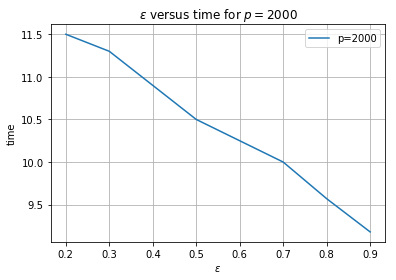

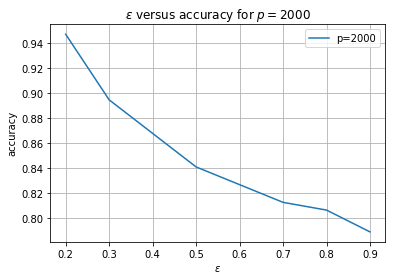

In [184]:
####2000 
eps = [0.2, 0.3, 0.5,0.7, 0.8,0.9] 
JLdim = [2125,1023, 442,281, 246,227] 
time = [11.5, 11.3, 10.5, 10, 9.57, 9.18] 
accuracy = [0.947400,0.894800, 0.841000, 0.812600, 0.806400,0.788900]
plt.plot(eps, time, label ="p=2000")
plt.grid()
plt.xlabel(r'$\epsilon$')
plt.ylabel('time')
plt.title(r'$\epsilon$ versus time for $p=2000$')
plt.legend()
plt.savefig('JLKnnEvsTime',dpi=300, bbox_inches='tight')
plt.show()
plt.plot(eps, accuracy,label ="p=2000")
plt.grid()
plt.xlabel(r'$\epsilon$')
plt.ylabel('accuracy')
plt.title(r'$\epsilon$ versus accuracy for $p=2000$')
plt.legend()
plt.savefig('JLKnnEvsAccuracy',dpi=300, bbox_inches='tight')
plt.show()

# JL + KD Trees

In [ ]:
###################KD Trees##############


tree = KDTree(A, leaf_size=2)              
# dist, ind = tree.query(A[:1], k=20)
dist, ind = tree.query(A, k=20) 
print(dist)

In [75]:
%%time
data = gendata(2000)
KDdim = 100
dataKD = data[:,:KDdim]
kdtrees = KNeighborsClassifier(n_neighbors=5, algorithm = 'kd_tree', n_jobs=1).fit(dataKD, labels)
score = accuracy_score(labels, kdtrees.predict(dataKD))
print('Accuracy:{0:f}'.format(score))

Accuracy:0.760600
CPU times: user 49.5 s, sys: 692 ms, total: 50.2 s
Wall time: 28.3 s


In [ ]:
####250 
eps = [0.7, 0.8,0.9] 
JLdim = [281, 246,227] 
time = [57.9, 54.9,53] 
accuracy = [0.995200, 0.995500,0.992900]


########with KD dim#############
####250 

KDdim = [20, 30,50, 70,100]  
time1 = [4.49, 5.97,8.91,14.3,23.1] 
accuracy1 = [0.828100, 0.859000,0.905300,0.931800, 0.957900]

####500  
KDdim = [20, 30,50, 70,100] 
time2 = [4.64, 5.94,8.91,14.3,22.1] 
accuracy2 = [0.774300, 0.795700,0.832600,0.859200, 0.883600]

####1000 
KDdim = [20, 30,50, 70,100] 
time3 = [5.59, 6.38, 8.43, 13.5, 22.2] 
accuracy3 = [0.731900, 0.744800, 0.780000, 0.797000, 0.820000]

####2000 
KDdim = [20, 30, 50, 70,100] 
time4 = [11.9, 12.8, 17.5,22.7,28.3] 
accuracy4 = [0.714000, 0.729100, 0.737600, 0.750500, 0.760600]



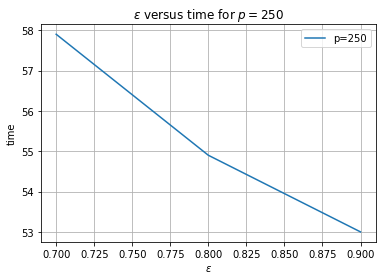

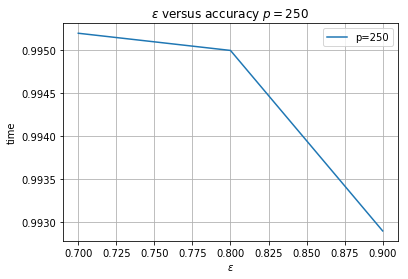

In [183]:
eps = [0.7, 0.8,0.9] 
JLdim = [281, 246,227] 
time = [57.9, 54.9,53] 
accuracy = [0.995200, 0.995000,0.992900]

plt.plot(eps, time,label ="p=250")
plt.grid()
plt.xlabel(r'$\epsilon$')
plt.ylabel('time')
plt.title(r'$\epsilon$ versus time for $p=250$')
plt.legend()
plt.savefig('JLKDtreeEvsTime.pdf',format='pdf', dpi=1500, bbox_inches='tight')
plt.show()
plt.plot(eps, accuracy,label ="p=250")
plt.grid()
plt.xlabel(r'$\epsilon$')
plt.ylabel('time')
plt.title(r'$\epsilon$ versus accuracy $p=250$')
plt.legend()
plt.savefig('JLKDtreeEvsAccuracy.pdf',format='pdf', dpi=1500, bbox_inches='tight')
plt.show()

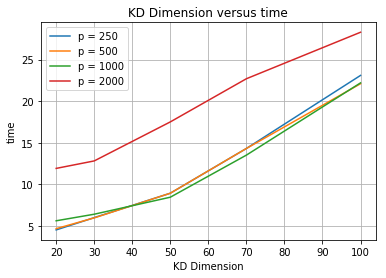

In [172]:
KDdim = [20, 30,50, 70,100]  
time1 = [4.49, 5.97,8.91,14.3,23.1] 
time2 = [4.64, 5.94,8.91,14.3,22.1]
time3 = [5.59, 6.38, 8.43, 13.5, 22.2]
time4 = [11.9, 12.8, 17.5,22.7,28.3] 

plt.plot(KDdim, time1, label='p = 250')
plt.plot(KDdim, time2, label='p = 500')
plt.plot(KDdim, time3, label='p = 1000')
plt.plot(KDdim, time4, label='p = 2000')
plt.xlabel('KD Dimension')
plt.ylabel('time')
plt.title('KD Dimension versus time')
plt.legend()
plt.grid()
plt.savefig('KDtreeEvsTime.pdf',format='pdf', dpi=1500, bbox_inches='tight')
plt.show()


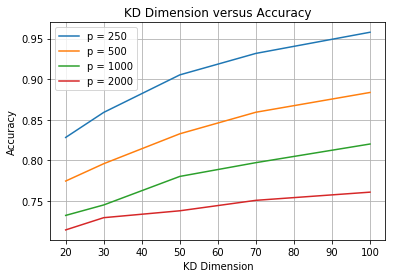

In [173]:
accuracy1 = [0.828100, 0.859000,0.905300,0.931800, 0.957900]
accuracy2 = [0.774300, 0.795700,0.832600,0.859200, 0.883600]
accuracy3 = [0.731900, 0.744800, 0.780000, 0.797000, 0.820000]
accuracy4 = [0.714000, 0.729100, 0.737600, 0.750500, 0.760600]

plt.plot(KDdim, accuracy1, label='p = 250')
plt.plot(KDdim, accuracy2, label='p = 500')
plt.plot(KDdim, accuracy3, label='p = 1000')
plt.plot(KDdim, accuracy4, label='p = 2000')
plt.xlabel('KD Dimension')
plt.ylabel('Accuracy')
plt.title('KD Dimension versus Accuracy')
plt.legend()
plt.grid()
plt.savefig('KDtreevsAccuracy.pdf',format='pdf', dpi=1500, bbox_inches='tight')
plt.show()

# E2LSH 

In [260]:
%%time
n = 1000
d = 1000
k = 5

p = falconn.get_default_parameters(n, d)
t = falconn.LSHIndex(p)
dataset = gendata(1000).astype(np.float32)
# print(dataset.shape)

# for i in range(10000):
t.setup(dataset)

q = t.construct_query_object()
Alsh = np.zeros((10000,10000))
for i in range(10000):
    KNNgraph = q.find_k_nearest_neighbors(dataset[i,:], 5)
    candidates = q.get_candidates_with_duplicates(dataset[1,:])
    UniqueCandidates = q.get_max_num_candidates()
    probes = q.get_num_probes()
    statistics = q.get_query_statistics()
    Alsh[i,KNNgraph] = 1

print(Alsh)
kmeansLSH = KNeighborsClassifier(n_neighbors=k, algorithm = 'brute', n_jobs=None).fit(A, labels)
score = accuracy_score(labels, kmeansLSH.predict(Alsh))
print('Accuracy:{0:f}'.format(score))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Accuracy:0.854700
CPU times: user 12.6 s, sys: 1.37 s, total: 13.9 s
Wall time: 9.37 s


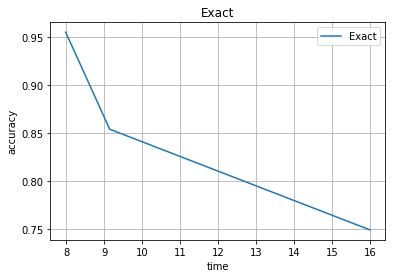

In [262]:
time = [7.98,8.47,9.14,16]
accuracy = [0.955200,0.912700,0.854200,0.749300]
fig, ax = plt.subplots()

ax.plot(time,accuracy, label='Exact')
# ax.plot(range(0,n),denoised[:], label='data_corrected')
ax.set_title('Exact')
ax.set_xlabel('time') 
ax.set_ylabel('accuracy')
ax.grid()
leg = ax.legend()
plt.savefig('LSH',dpi=300, bbox_inches='tight')
plt.show()

# Power Method

In [89]:
data = gendata(250)
A_All = {}
for i in range(1):
    A_All[i] = kneighbors_graph(data, n_neighbors=5)



In [96]:
Adata = A_All[0].toarray()
w, v = np.linalg.eig(Adata)

In [114]:

###############power method##############

firstEV = np.random.rand(Adata.shape[0], 1)
secondEV = np.random.rand(Adata.shape[0], 1)
Apow = Adata

for _ in range(1000):
    
#     eigenval = np.matmul(firstEV.T, np.matmul(A.T, firstEV))/np.matmul(firstEV.T,firstEV)
    tempEV = np.matmul(Apow, firstEV)
    tempEV = tempEV/np.linalg.norm(tempEV)
    firstEV = tempEV

eigenval = np.linalg.norm(firstEV)
B = Apow - eigenval*np.matmul(firstEV, firstEV.T)
    
for _ in range(1000):
    
    
    tempEV = np.matmul(B, secondEV)
    tempEV = tempEV/np.linalg.norm(tempEV)
    secondEV = tempEV
    
    
    
    
    
secondEV 

# w, v = np.linalg.eig(A)

array([[ 0.01082991],
       [ 0.00981527],
       [ 0.0068765 ],
       ...,
       [-0.01082465],
       [-0.00477892],
       [-0.00885343]])

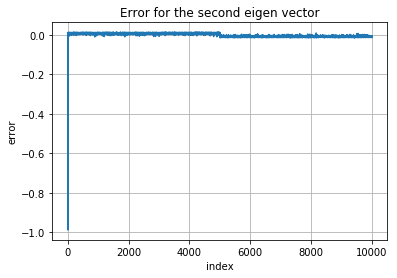

In [201]:
secondEV = secondEV.reshape((10000))
error = secondEV- v[:,2]
plt.plot(range(len(error[:])),error[:])
plt.xlabel('index')
plt.ylabel('error')
plt.title('Error for the second eigen vector')
# plt.legend()
plt.grid()
plt.savefig('Error.pdf',format='pdf', dpi=1500, bbox_inches='tight')

In [107]:
v[:,2]

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

In [ ]:
test_lsh_index_positive()